In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest2.csv")
df.head(20)

,question_id,student_answer,score
0,2,الايمان بالكتب والملائكة والناس أجمعين,1.0
1,2,الايمان بالله و ملائكته و كتبه و رسله و اليوم ...,2.5
2,2,الايمان بالله,0.5
3,2,الايمان بملائكته,0.5
4,2,الايمان بكتبه,0.5
5,2,الايمان برسله,0.5
6,2,الايمان باليوم الآخر,0.5
7,2,الايمان بالملائكة,0.5
8,2,الايمان بالكتب,0.5
9,2,الايمان بالرسل,0.5


In [59]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   question_id     117 non-null    int64  
 1   student_answer  117 non-null    object 
 2   score           117 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [60]:
df.groupby('score').size()

score
0.0    11
0.5    14
1.0    32
1.5     4
2.0    22
2.5    34
dtype: int64

In [61]:
df.duplicated().sum()

37

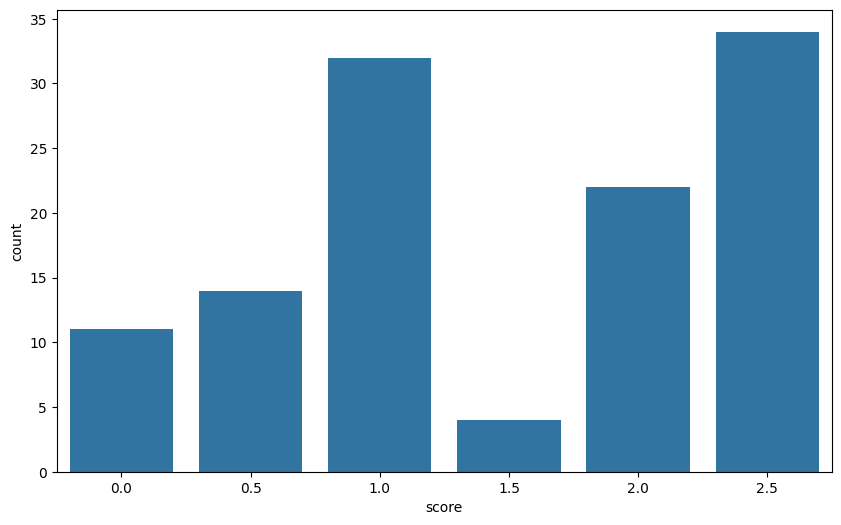

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [63]:
import pandas as pd
df = pd.read_csv('./quest2.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 2 ))
csv = './question2.csv'
df2.to_csv(csv,index=False)
print(len(df1))

80


In [66]:
df = pd.read_csv("question2.csv")
df.head(20)

,question_id,student_answer,score
0,2,الايمان بالكتب والملائكة والناس أجمعين,2
1,2,الايمان بالله و ملائكته و كتبه و رسله و اليوم ...,5
2,2,الايمان بالله,1
3,2,الايمان بملائكته,1
4,2,الايمان بكتبه,1
5,2,الايمان برسله,1
6,2,الايمان باليوم الآخر,1
7,2,الايمان بالملائكة,1
8,2,الايمان بالكتب,1
9,2,الايمان بالرسل,1


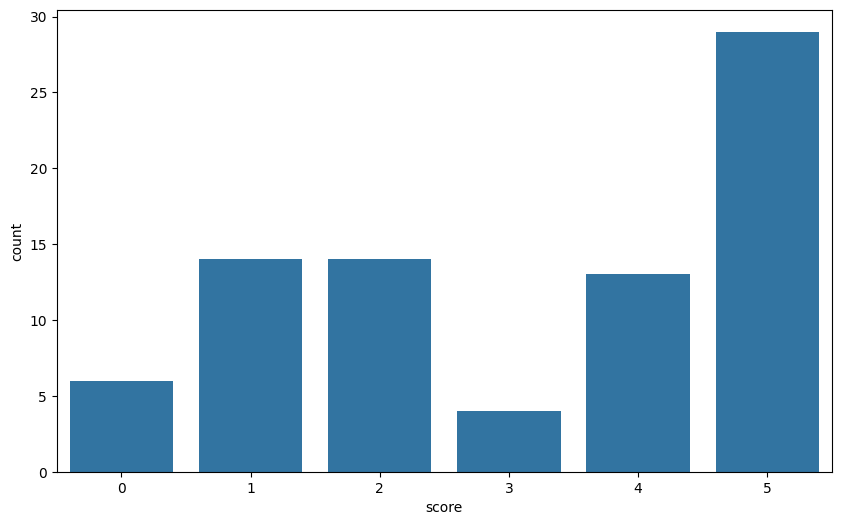

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [68]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [69]:
import nltk
from nltk.tokenize import word_tokenize

In [70]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [71]:
from gensim.models import Word2Vec

In [72]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [73]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [74]:
df.head(5)

,question_id,student_answer,score,tokens,textvector
0,2,الايمان بالكتب والملائكة والناس أجمعين,2,"[الايمان, بالكتب, والملائكة, والناس, أجمعين]","[-0.008334595, -0.016339546, -0.01579408, -0.0..."
1,2,الايمان بالله و ملائكته و كتبه و رسله و اليوم ...,5,"[الايمان, بالله, و, ملائكته, و, كتبه, و, رسله,...","[0.0032318998, 0.052417204, 0.042462163, 0.042..."
2,2,الايمان بالله,1,"[الايمان, بالله]","[-0.015153467, 0.0052764285, -0.0015083309, 0...."
3,2,الايمان بملائكته,1,"[الايمان, بملائكته]","[0.0016905554, 0.0011120366, -0.016264178, 0.0..."
4,2,الايمان بكتبه,1,"[الايمان, بكتبه]","[-0.0021669194, -0.0076365443, -0.01623838, -0..."
